# Question 2
Kyle Robinson

\#20540871

Dr. Edith Law

CS680

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import math
import random
import matplotlib.pyplot as plt

In [2]:
#data_folds gathers all of the data fro, the seperate files for concatination
data_folds = []

#Each data and label file is combined into one dataframe per fold
#The labels are added as a new column titled 'label'
#The fold is added as a new column titled 'fold'
for i in range(10):
    labels = pd.read_csv("knn-dataset/labels"+str((i+1))+".csv", names=['label'])
    data_folds.append(pd.read_csv("knn-dataset/data"+str((i+1))+".csv", header=None))
    data_folds[i] = data_folds[i].join(labels)
    data_folds[i]['fold']=i+1

#The individual data_folds dataframes are combined into one called 'data'
data = pd.concat(data_folds, ignore_index = True)

#Set a random seed to maintain uniform results each run (Because it's an assignment)
#4 because it's my favourite number
random.seed(4)

data

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,label,fold
0,0,0,11,0,16,0,0,0,4,0,...,0,0,0,0,3,5,0,0,6,1
1,0,0,9,16,16,16,0,0,0,0,...,3,0,15,13,10,3,0,16,5,1
2,9,16,15,10,16,16,0,0,16,13,...,0,16,16,7,16,16,16,3,6,1
3,0,0,0,6,0,1,0,0,0,0,...,0,0,0,0,2,0,0,0,5,1
4,0,5,0,14,16,0,0,0,0,0,...,0,3,0,9,0,8,0,0,6,1
5,0,0,0,12,12,1,0,0,0,4,...,0,0,0,13,16,15,15,0,6,1
6,0,0,0,10,0,0,0,11,9,0,...,0,0,4,5,13,15,14,0,6,1
7,10,3,15,16,6,13,15,16,13,16,...,0,16,15,16,16,16,16,11,6,1
8,14,9,16,16,16,13,16,5,15,15,...,14,12,16,16,16,8,15,12,5,1
9,16,13,16,16,16,12,11,7,5,16,...,10,15,10,16,16,16,10,16,6,1


k_1     0.738739
k_2     0.723423
k_3     0.789189
k_4     0.779279
k_5     0.786486
k_6     0.772973
k_7     0.807207
k_8     0.796396
k_9     0.802703
k_10    0.801802
k_11    0.805405
k_12    0.798198
k_13    0.800901
k_14    0.800901
k_15    0.807207
k_16    0.795495
k_17    0.802703
k_18    0.809009
k_19    0.808108
k_20    0.815315
k_21    0.812613
k_22    0.805405
k_23    0.818919
k_24    0.810811
k_25    0.811712
k_26    0.814414
k_27    0.815315
k_28    0.808108
k_29    0.810811
k_30    0.809910
dtype: float64
Minimum k-value:k_23


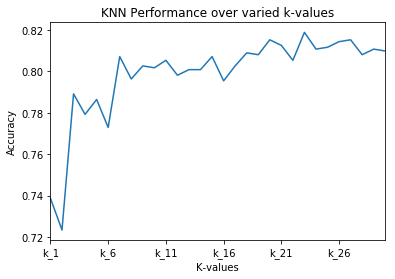

In [3]:
# https://en.wikipedia.org/wiki/Euclidean_distance
count = 0
def knn_predict(test_data, point, k, n=64):
    """Tests a single multi-dimensional data point against labeled data. The test
    dataframe should contain a column with actual labels named 'label'
    
    test_data: pandas dataframe containing n-columns of numerical attributes
    point: pandas series containing n-columns of numerical attributes
    k: number of neighbors to test against
    n: number of attributes (must be the first columns in dataframe)
    
    Returns a pandas Series of classifications for each value <=k"""
    
    #Reset the data index in case data is from the same dataframe
    test_data.reset_index(drop=True,inplace=True)
    
    #Subtract and aquare the point's attributes from the test_data attributes
    #Replaces the test_data attribute values with the results
    for column in test_data.iloc[:,:n]:
        test_data[column] = (point[column]-test_data[column])**2
    
    #Apply a sum function row-wise and square the result
    #Create a new column called 'dist' where euclidean distance is stored
    test_data['dist'] = test_data.apply(lambda row: math.sqrt(np.sum(row)), axis=1)
    
    #Sort the dataframe by distance (lowest first)
    test_data = test_data.sort_values(by=['dist'])
    
    #For each value <=k calculate the mode of the labels
    #Store the mode for each assosiated k in an array titled'labels'
    #In the event of a tie select the mode randomly
    labels = []
    for i in range(k):
        mode = test_data.head(i+1)['label'].mode()
        if mode.size > 1:
            labels.append(mode.iloc[random.randint(0,1)])
            global count
            count += 1
        else:
            labels.append(mode.iloc[0])
            
    #Return a pandas Series of classifications for each value <=k
    return pd.Series(labels)


def knn(train, test, k=30, n=64):
    """Tests a data set using KNN under given parameters.
    
    train: pandas dataframe with labels in a 'label' column and n attribute columns
    test: pandas dataframe with n-attribute columns (must be first)
    k: number of neighbors to test against
    n: number of attributes (must be the first columns in dataframe)
    
    Returns a pandas dataframe of classifications for values <=k (maintains label columns)"""
    
    #For all values <=k create a new column named 'k_#' where # is the k-value
    column_names = []
    for i in range(k):
        column_names.append('k_'+str(i+1))
        
    #Apply the knn_predict function to each point in the test dataframe
    #Store results in the associated 'k_#' column for each point in the test dataframe
    test[column_names] = test.apply(lambda row: knn_predict(train.copy(), row, k, n), axis=1)
    column_names.extend(['label'])
    
    #Return dataframe of 'k_#' results, and label columns
    return test[column_names]


def knn_10_fold(data, k=30, n=64):
    """Compute the accuracy of KNN accross difference values <=k (# of neighbors not folds)
    
    data: pandas dataframe with labels in a 'label' column, folds in the 'fold column and n attribute columns
    k: number of neighbors to test against
    n: number of attributes (must be the first columns in dataframe)
    
    Returns pandas series of associated accuracies for values <=k"""
    
    #The knn function is run by finding each fold and testing against all others
    #The results of each folds testing are stored in the 'folds' array as pandas dataframes
    folds = []
    for i in range(10):
        folds.append(knn(data.loc[data['fold']!=i+1].copy(), data.loc[data['fold']==i+1].copy(),k))
    
    #Combine knn results from all folds into one dataframe
    data = pd.concat(folds)
    
    def verify_labels(row):
        """Given a row return a row with 1's and 0's after comparing against label
        
        row: pandas series of calssifications for values <=k
        
        Return pandas series with binary values for correct/incorrect classifications"""
        
        #Store the correct label for each row
        correct_label = row.iloc[k]
        
        #Modify each column to a 1 or 0 based on comparison against correct_label
        for i in range(k):
            if row.iloc[i] == correct_label:
                row.iloc[i] = 1
            else:
                row.iloc[i] = 0
        
        #Return a pandas series of classification results for values <=k
        return row
    
    #Apply the verify labels function row-wise
    data.apply(verify_labels, axis=1)
    
    #Drop the label column as it's no longer needed
    data = data.drop(['label'], axis=1)
    
    def get_means(column):
        """Get the means of all columns.
        
        column: pandas series
        
        Returns the mean of the pandas series"""
        return column.mean()
    
    #Apply the get_means function column-wise and store the results (pandas series) in 'performance'
    performance = data.apply(get_means)
    
    #Return the pandas series containing performance results
    return performance

#Run the 10-fold KNN validation on the data
results = knn_10_fold(data)

#Plot the results
plot = results.plot.line(title='KNN Performance over varied k-values')
plot.set_xlabel("K-values")
plot.set_ylabel("Accuracy")

#Display plot in Jupyter
plot

#Print results
print(results)
print("Minimum k-value:"+str(results.idxmax()))

In [4]:
#fig = plot.get_figure()
#fig.savefig("Q2_graph.pdf")